<a href="https://colab.research.google.com/github/mshilpaa/ethereum-data-analysis/blob/master/Algorithms/DB_Scan2(with_labels).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import cluster
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler, PowerTransformer, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import random
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

In [0]:
raw_data = pd.read_csv('/content/gdrive/My Drive/project_data/final_data.csv')
data = raw_data.iloc[:30000,1:]

In [4]:
 data_with_labels = pd.read_csv('/content/gdrive/My Drive/project_data/final_data_of_labels.csv')

 without_address = data_with_labels.iloc[:,1:]
 without_address.head()
 frames = [without_address,data]
 data = pd.concat(frames)
 data.head()
 

,no_of_in_transactions,tot_ether_recieved,eth_balance,no_of_out_transactions,tot_ether_sent,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved
0,76,0.731680,1.749834e+17,3370,5.515366,6.650000e+02,1.144667e+10,571899.631579,1.542536e+04,18,10.857143,187.222222,0.306409,0.040649
1,38,743.099990,1.173769e+20,107756,380.117988,4.578265e+12,3.926573e+12,881654.973684,3.142301e+02,14,3.800000,7700.285714,27.151285,53.078571
2,32,9574.442265,5.529880e+18,4187,13440.143033,2.215655e+56,3.021617e+56,254212.625000,2.146797e+03,5,8.000000,837.400000,2688.028607,1914.888453
3,55,40.151860,3.103932e+19,28,10.105297,1.262155e+07,1.382587e+05,824758.618182,1.212605e+06,14,4.583333,4.000000,0.721807,2.867990
4,43,183.158125,1.276902e+20,5762,54.066817,2.521367e+07,3.642789e+06,918001.674419,8.381761e+03,17,3.583333,338.941176,3.180401,10.774007


In [7]:
pipe = Pipeline([('scale', StandardScaler()), ('PCA', PCA(n_components=6))])

results = pipe.fit_transform(data)

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=.2)

db.fit(results)

print(db.components_.shape)

labels = np.unique(db.labels_)
indices = db.core_sample_indices_

sample, outliers = results[indices], np.delete(results, indices, axis=0)
s_labels, o_labels = db.labels_[indices], np.delete(db.labels_, indices, axis=0)

(29791, 6)


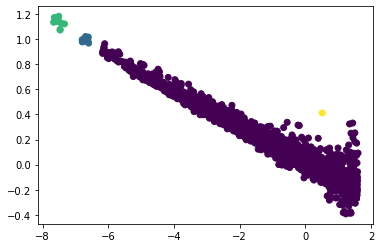

In [8]:
# plt.scatter(outliers[:,0], outliers[:,1], c='black', alpha=.2)
plt.scatter(sample[:,3], sample[:,4], c= s_labels)

# plt.xlim(-1,30)
# plt.ylim(-1,20)

(-1.0, 1.0)

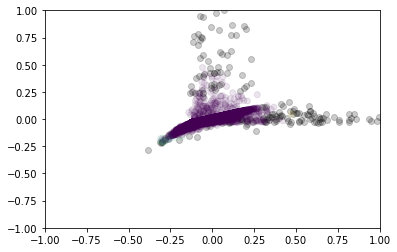

In [9]:

plt.scatter(outliers[:,0], outliers[:,1], c='black', alpha=.2)
plt.scatter(sample[:,0], sample[:,1], c= s_labels, alpha= .1)

plt.xlim(-1,1)
plt.ylim(-1,1)

In [10]:

np.unique(db.labels_)

array([-1,  0,  1,  2,  3])

In [0]:
data['labels'] = pd.DataFrame(o_labels, columns=["Lables"])
data['address'] = pd.concat([data_with_labels.iloc[:,0],raw_data.iloc[:30000,0]])

In [23]:
data.head()

,no_of_in_transactions,tot_ether_recieved,eth_balance,no_of_out_transactions,tot_ether_sent,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved,labels,address
0,76,0.731680,1.749834e+17,3370,5.515366,6.650000e+02,1.144667e+10,571899.631579,1.542536e+04,18,10.857143,187.222222,0.306409,0.040649,-1.0,0x1d1c9f70a68c129096d8181529041843e8bc1a30
1,38,743.099990,1.173769e+20,107756,380.117988,4.578265e+12,3.926573e+12,881654.973684,3.142301e+02,14,3.800000,7700.285714,27.151285,53.078571,-1.0,0x2faf487a4414fe77e2327f0bf4ae2a264a776ad2
2,32,9574.442265,5.529880e+18,4187,13440.143033,2.215655e+56,3.021617e+56,254212.625000,2.146797e+03,5,8.000000,837.400000,2688.028607,1914.888453,-1.0,0xaf8ae6955d07776ab690e565ba6fbc79b8de3a5d
3,55,40.151860,3.103932e+19,28,10.105297,1.262155e+07,1.382587e+05,824758.618182,1.212605e+06,14,4.583333,4.000000,0.721807,2.867990,-1.0,0x8b99f3660622e21f2910ecca7fbe51d654a1517d
4,43,183.158125,1.276902e+20,5762,54.066817,2.521367e+07,3.642789e+06,918001.674419,8.381761e+03,17,3.583333,338.941176,3.180401,10.774007,-1.0,0x15c5312e24482547ff35899afedcaeb572ecb029


In [30]:
labels = pd.read_csv('/content/gdrive/My Drive/project_data/label_cate.csv')
labels['address'] = labels["Addreses"]
# labels = labels.drop("Addreses")
labels = labels.drop(0)
labels.head()

,Unnamed: 0,Addreses,Label,Category,address
1,1,0xe73480759efb6731d133b382ab8df02774e3a265,0xUniverse: Contract 1,0xUniverse,0xe73480759efb6731d133b382ab8df02774e3a265
2,2,0xf91d60c576fc809bea7a08d45ee3d6d77fbf5ff7,0xUniverse: Contract 2,0xUniverse,0xf91d60c576fc809bea7a08d45ee3d6d77fbf5ff7
3,3,0xe658e6eb4b478da2cf36d9e3712ba0c1b33786a1,0xUniverse: Contract 3,0xUniverse,0xe658e6eb4b478da2cf36d9e3712ba0c1b33786a1
4,4,0xa36a81e47d032cb5608175cf884d079ff7b2fb42,0xUniverse: Wallet 1,0xUniverse,0xa36a81e47d032cb5608175cf884d079ff7b2fb42
5,5,0x28fbe46d43ae10f0afe84e393368b891a3de98ea,0xUniverse: Wallet 2,0xUniverse,0x28fbe46d43ae10f0afe84e393368b891a3de98ea


In [40]:
labels = pd.read_csv('/content/gdrive/My Drive/project_data/label_cate.csv')
labels['address'] = labels["Addreses"]
labels = labels.drop(["Unnamed: 0"],axis = 1)
# labels = labels.drop(	"0")
labels.head()


,Addreses,Label,Category,address
0,0x06a6a7af298129e3a2ab396c9c06f91d3c54aba8,0xUniverse Token,0xUniverse,0x06a6a7af298129e3a2ab396c9c06f91d3c54aba8
1,0xe73480759efb6731d133b382ab8df02774e3a265,0xUniverse: Contract 1,0xUniverse,0xe73480759efb6731d133b382ab8df02774e3a265
2,0xf91d60c576fc809bea7a08d45ee3d6d77fbf5ff7,0xUniverse: Contract 2,0xUniverse,0xf91d60c576fc809bea7a08d45ee3d6d77fbf5ff7
3,0xe658e6eb4b478da2cf36d9e3712ba0c1b33786a1,0xUniverse: Contract 3,0xUniverse,0xe658e6eb4b478da2cf36d9e3712ba0c1b33786a1
4,0xa36a81e47d032cb5608175cf884d079ff7b2fb42,0xUniverse: Wallet 1,0xUniverse,0xa36a81e47d032cb5608175cf884d079ff7b2fb42


In [0]:
merged_label =pd.merge(labels,data , on='address', how='inner')

In [44]:
merged_label.shape

(128, 19)

In [72]:
p  = list(set(merged_label["Category"]))
p.sort()
c = list(merged_label["Category"])
for  i in p[35:]:
  print(i, c.count(i))

KuCoin 2
LAToken 3
Liquid 2
MESG 3
MegaCryptoPolis 1
MiningPoolHub 1
Nexo 3
OTC 4
Okex 2
OpenSea 1
Orchid 1
Origin-Protocol 1
Origo 1
POA-Network 2
Paribu 2
QuadrigaCX 1
Remitano 2
Remme 1
Resfinex 1
Sablier 1
Scroll-Network 3
Silverway-Platform 1
Swipe-io 2
Syscoin 1
TAGZ 2
Tidex 2
Tokenlon 1
TopBTC 1
Trade-io 3
Trading 1
Upbit 3
Wallet-App 5
YUNBI 2
ZB-com 1


In [64]:
 groups = merged_label.groupby("Category")
 groups.describe()

no_of_in_transactions                ... labels     
                                      count          mean  ...    75%  max
Category                                                   ...            
0xUniverse                              1.0  1.500000e+01  ...   -1.0 -1.0
ABCC                                    1.0  2.009900e+04  ...   -1.0 -1.0
Advertising                             1.0  1.000000e+01  ...    0.0  0.0
Basic-Attention-Token                   2.0  8.500000e+00  ...   -1.0 -1.0
Bgogo                                   1.0  7.639000e+03  ...   -1.0 -1.0
...                                     ...           ...  ...    ...  ...
Trading                                 1.0  4.228900e+04  ...   -1.0 -1.0
Upbit                                   3.0  4.329363e+05  ...   -1.0 -1.0
Wallet-App                              5.0  3.122344e+05  ...   -1.0  0.0
YUNBI                                   2.0  3.475000e+02  ...   -1.0 -1.0
ZB-com                                  1.0  1.479089e+06  ...   -1.0 -1.0

[69 rows x 120 columns]

In [46]:
a = pd.DataFrame(merged_label.loc[merged_label['labels']== -1], columns=merged_label.columns)
print(max(set(list(a["Category"])), key = list(a["Category"]).count))
print(a.shape)
a.head(20)

Cold-Wallet
(115, 19)


,Addreses,Label,Category,address,no_of_in_transactions,tot_ether_recieved,eth_balance,no_of_out_transactions,tot_ether_sent,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved,labels
0,0xa36a81e47d032cb5608175cf884d079ff7b2fb42,0xUniverse: Wallet 1,0xUniverse,0xa36a81e47d032cb5608175cf884d079ff7b2fb42,15,4.920000e+01,1.912256e+18,6562,418.638612,1.665267e+04,2.639419e-10,3.839832e+06,8.899498e+03,21,2.142857,312.476190,19.935172,2.342857,-1.0
1,0x05f51aab068caa6ab7eeb672f88c180f67f17ec7,ABCC,ABCC,0x05f51aab068caa6ab7eeb672f88c180f67f17ec7,20099,1.656953e+05,9.487106e+19,37999,165590.530841,4.866121e+09,2.713457e+09,3.089994e+03,1.635020e+03,25,803.960000,1519.960000,6623.621234,6627.811383,-1.0
3,0x7c31560552170ce96c4a7b018e93cddc19dc61b6,BAT: UGP Reserve,Basic-Attention-Token,0x7c31560552170ce96c4a7b018e93cddc19dc61b6,11,2.352409e+01,1.962163e+18,202,21.239255,3.663980e+08,3.260926e+08,6.415074e+06,4.487326e+05,28,2.200000,7.214286,0.758545,0.840146,-1.0
4,0x44fcfabfbe32024a01b778c025d70498382cced0,BAT: Wallet,Basic-Attention-Token,0x44fcfabfbe32024a01b778c025d70498382cced0,6,7.734625e+04,0.000000e+00,26,134990.958281,4.212388e+07,2.500000e+03,1.043674e+07,3.404280e+06,16,1.200000,2.000000,8436.934893,4834.140759,-1.0
5,0xce1bf8e51f8b39e51c6184e059786d1c0eaf360f,Bgogo 2,Bgogo,0xce1bf8e51f8b39e51c6184e059786d1c0eaf360f,7639,9.957230e+04,2.520344e+17,95,99572.002695,4.496334e+08,4.496257e+08,3.732771e+03,4.592075e+05,13,848.777778,7.307692,7659.384823,7659.407687,-1.0
6,0xe79eef9b9388a4ff70ed7ec5bccd5b928ebb8bd1,BitMart,BitMart,0xe79eef9b9388a4ff70ed7ec5bccd5b928ebb8bd1,61261,1.325757e+05,1.999790e+17,105860,132564.418802,9.109262e+58,2.284072e+10,1.160558e+03,6.713195e+02,21,3224.263158,5040.952381,6312.591372,6313.129230,-1.0
7,0x03bdf69b1322d623836afbd27679a1c0afa067e9,Bitmax 1,BitMax-io,0x03bdf69b1322d623836afbd27679a1c0afa067e9,45492,4.689207e+05,4.884396e+17,105313,469121.022036,8.121125e+09,4.861883e+09,8.016777e+02,4.790986e+02,17,3032.800000,6194.882353,27595.354237,27583.568582,-1.0
8,0x03bdf69b1322d623836afbd27679a1c0afa067e9,Bitmax 1,Derivatives,0x03bdf69b1322d623836afbd27679a1c0afa067e9,45492,4.689207e+05,4.884396e+17,105313,469121.022036,8.121125e+09,4.861883e+09,8.016777e+02,4.790986e+02,17,3032.800000,6194.882353,27595.354237,27583.568582,-1.0
9,0x4b1a99467a284cc690e3237bc69105956816f762,Bitmax 2,BitMax-io,0x4b1a99467a284cc690e3237bc69105956816f762,8744,1.530964e+05,3.829955e+20,738,152712.992110,4.232264e+09,3.240477e+09,6.314880e+03,7.022195e+04,22,397.454545,41.000000,6941.499641,6958.929391,-1.0
10,0x986a2fca9eda0e06fbf7839b89bfc006ee2a23dd,Bitmax 3,BitMax-io,0x986a2fca9eda0e06fbf7839b89bfc006ee2a23dd,13230,6.627298e+05,2.454042e+21,65085,661684.637866,2.028899e+09,1.842212e+09,1.414759e+03,2.875070e+02,8,1653.750000,8138.000000,82710.579733,82841.229158,-1.0


In [48]:
b =pd.DataFrame(merged_label.loc[merged_label['labels']== 0], columns=merged_label.columns)
print(max(set(list(b["Category"])), key = list(b["Category"]).count))
print(b.shape)
b.head(20)

Advertising
(10, 19)


,Addreses,Label,Category,address,no_of_in_transactions,tot_ether_recieved,eth_balance,no_of_out_transactions,tot_ether_sent,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved,labels
2,0x5d46594e6b0508326eb921790eb91d546f5daedb,pclab.io,Advertising,0x5d46594e6b0508326eb921790eb91d546f5daedb,10,6.715119e+00,1.703593e+18,69,4.971000e+00,2.530817e+07,1.082655e+07,3.962936e+06,5.446706e+05,16,1.250000,4.600000,0.310687,0.419695,0.0
33,0xed48484223e6cd3347aea641bc299e43282634a0,CryptoAtoms: Deployer,CryptoAtoms,0xed48484223e6cd3347aea641bc299e43282634a0,3,8.633951e-02,7.673722e+17,484,1.401395e-01,1.410001e+02,2.053500e-14,1.038411e+07,1.132260e+05,22,1.500000,22.000000,0.006370,0.003925,0.0
57,0xa12431d0b9db640034b0cdfceef9cce161e62be4,HitBTC 3,HitBTC,0xa12431d0b9db640034b0cdfceef9cce161e62be4,355247,4.245100e+06,2.388585e+21,97628,4.243888e+06,1.157921e+59,9.381924e+11,2.038414e+02,7.416967e+02,29,12249.965517,3366.689655,146340.952735,146382.766018,0.0
81,0xffec0067f5a79cff07527f63d83dd5462ccf8ba4,Nexo 2,Nexo,0xffec0067f5a79cff07527f63d83dd5462ccf8ba4,5,4.449600e+01,6.297487e+19,82905,3.100000e+01,5.540958e+09,8.294450e+08,1.153267e+07,7.438463e+02,25,1.000000,3316.560000,1.240000,1.779840,0.0
85,0x2b1ce95573ec1b927a90cb488db113b40eeb064a,Orchid: Deployer,Orchid,0x2b1ce95573ec1b927a90cb488db113b40eeb064a,5,8.958519e-01,1.393245e+17,314,2.510178e-01,5.784505e+59,1.500029e+07,3.951220e+05,3.885289e+04,4,2.500000,78.500000,0.062754,0.223963,0.0
86,0xaed9fdc9681d61edb5f8b8e421f5cee8d7f4b04f,Origin: Deployer,Origin-Protocol,0xaed9fdc9681d61edb5f8b8e421f5cee8d7f4b04f,4,9.110000e+00,3.004606e+18,111,0.000000e+00,5.000000e+09,2.000000e+09,1.507538e+05,1.820513e+05,5,2.000000,22.200000,0.000000,1.822000,0.0
92,0x1074f62d7019c3184a2f7ea8c6a8acd6780beb48,Gitcoin Grants: POA Network,POA-Network,0x1074f62d7019c3184a2f7ea8c6a8acd6780beb48,3,1.119713e+00,4.210000e+13,10,1.116927e+00,1.004100e+03,1.002000e+03,7.422888e+06,2.226833e+06,3,1.500000,3.333333,0.372309,0.373238,0.0
99,0x7c25bb1dd0fb91c69664c461909161a14dee9782,Sablier: Deployer,Sablier,0x7c25bb1dd0fb91c69664c461909161a14dee9782,3,2.545950e-01,2.853709e+17,168,5.780544e+01,8.466257e+58,9.941086e+04,7.280784e+06,1.301221e+05,10,1.500000,16.800000,5.780544,0.025459,0.0
115,0x5a2fad810f990c4535ada938400b6b67ef7646af,Trade.io: Wallet 2,Trade-io,0x5a2fad810f990c4535ada938400b6b67ef7646af,25,1.672713e+04,8.455180e+15,418,1.753492e+04,1.461302e+07,1.452835e+07,1.662525e+06,1.521781e+05,20,2.500000,20.900000,876.745857,836.356563,0.0
120,0x6b59210ade46b62b25e82e95ab390a7ccadd4c3a,Bitberry,Wallet-App,0x6b59210ade46b62b25e82e95ab390a7ccadd4c3a,21938,6.781886e+04,2.266140e+21,115673,6.534702e+04,2.299351e+12,2.126880e+12,2.383239e+03,4.511738e+02,21,1044.666667,5508.238095,3111.763020,3229.469744,0.0


In [50]:
c =pd.DataFrame(merged_label.loc[merged_label['labels']== 2], columns=merged_label.columns)
print(max(set(list(c["Category"])), key = list(c["Category"]).count))
print(c.shape)
c.head(20)

Derivatives
(1, 19)


,Addreses,Label,Category,address,no_of_in_transactions,tot_ether_recieved,eth_balance,no_of_out_transactions,tot_ether_sent,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved,labels
43,0x8f3ab2c3b651382b07a76653d2be9eb4b87e1630,YOOBTC 1,Derivatives,0x8f3ab2c3b651382b07a76653d2be9eb4b87e1630,20,6.549113,7.416926e+17,1597,5.617546,237566.032658,217750.736701,235789.8,6160.361929,5,10.0,319.4,1.123509,1.309823,2.0


In [51]:
d =pd.DataFrame(merged_label.loc[merged_label['labels']== 3], columns=merged_label.columns)
print(max(set(list(d["Category"])), key = list(d["Category"]).count))
print(d.shape)
d.head(20)

Liquid
(1, 19)


,Addreses,Label,Category,address,no_of_in_transactions,tot_ether_recieved,eth_balance,no_of_out_transactions,tot_ether_sent,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved,labels
73,0xedbb72e6b3cf66a792bff7faac5ea769fe810517,Liquid,Liquid,0xedbb72e6b3cf66a792bff7faac5ea769fe810517,31772,716079.114166,2.624801e+21,24997,713448.651695,2.024540e+10,3.856235e+09,2719.804136,3469.817138,31,1024.903226,806.354839,23014.472635,23099.326263,3.0


In [0]:
final_data = pd.read_csv('/content/gdrive/My Drive/project_data/data_with_cluster_name.csv')

In [0]:
final_data = final_data.drop(["Unnamed: 0"],axis =1)

In [78]:
final_data.head()

,address,no_of_in_transactions,tot_ether_recieved,eth_balance,no_of_out_transactions,tot_ether_sent,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved,labels
0,0x1d1c9f70a68c129096d8181529041843e8bc1a30,76,0.731680,1.749834e+17,3370,5.515366,6.650000e+02,1.144667e+10,571899.631579,1.542536e+04,18,10.857143,187.222222,0.306409,0.040649,4
1,0x2faf487a4414fe77e2327f0bf4ae2a264a776ad2,38,743.099990,1.173769e+20,107756,380.117988,4.578265e+12,3.926573e+12,881654.973684,3.142301e+02,14,3.800000,7700.285714,27.151285,53.078571,5
2,0xaf8ae6955d07776ab690e565ba6fbc79b8de3a5d,32,9574.442265,5.529880e+18,4187,13440.143033,2.215655e+56,3.021617e+56,254212.625000,2.146797e+03,5,8.000000,837.400000,2688.028607,1914.888453,5
3,0x8b99f3660622e21f2910ecca7fbe51d654a1517d,55,40.151860,3.103932e+19,28,10.105297,1.262155e+07,1.382587e+05,824758.618182,1.212605e+06,14,4.583333,4.000000,0.721807,2.867990,0
4,0x15c5312e24482547ff35899afedcaeb572ecb029,43,183.158125,1.276902e+20,5762,54.066817,2.521367e+07,3.642789e+06,918001.674419,8.381761e+03,17,3.583333,338.941176,3.180401,10.774007,5


In [0]:
groups = final_data.groupby("labels")

In [0]:
zeroth_group = groups.get_group(0)
first_group = groups.get_group(1)
second_group = groups.get_group(2)
third_group = groups.get_group(3)
fourth_group = groups.get_group(4)
fifth_group = groups.get_group(5)
sixth_group = groups.get_group(5)

In [0]:
zeroth_group.to_csv(r'/content/gdrive/My Drive/project_data/groups/zero.csv', index = True)
first_group.to_csv(r'/content/gdrive/My Drive/project_data/groups/first.csv', index = True)
second_group.to_csv(r'/content/gdrive/My Drive/project_data/groups/second.csv', index = True)
third_group.to_csv(r'/content/gdrive/My Drive/project_data/groups/third.csv', index = True)
fourth_group.to_csv(r'/content/gdrive/My Drive/project_data/groups/fourth.csv', index = True)
fifth_group.to_csv(r'/content/gdrive/My Drive/project_data/groups/fifth.csv', index = True)
sixth_group.to_csv(r'/content/gdrive/My Drive/project_data/groups/sixth.csv', index = True)

In [0]:
data_with_labels = pd.read_csv('/content/gdrive/My Drive/project_data/data_with_labels.csv')

In [0]:
labels_groups = data_with_labels.groupby("labels")

In [98]:
 group_0 = list(labels_groups.get_group(0)["Category"])
 cat_0 = {}
 for i in group_0:
   cat_0[i] = cat_0.get(i,0)+1

print(cat_0)


{'Charity': 1}


In [99]:
 group_1 = list(labels_groups.get_group(1)["Category"])
 cat_1 = {}
 for i in group_1:
   cat_1[i] = cat_1.get(i,0)+1

print(cat_1)

{'Basic-Attention-Token': 1, 'Coinone': 2, 'Cold-Wallet': 1, 'GBX': 1, 'Kraken': 1, 'OpenSea': 1, 'OTC': 1}


In [100]:
 group_2 = list(labels_groups.get_group(2)["Category"])
 cat_2 = {}
 for i in group_2:
   cat_2[i] = cat_2.get(i,0)+1

print(cat_2)

{'Curve-fi': 1, 'Kraken': 1, 'Liquid': 1, 'MESG': 3, 'POA-Network': 2, 'Resfinex': 1, 'Scroll-Network': 1, 'Swipe-io': 2}


In [101]:
 group_3 = list(labels_groups.get_group(3)["Category"])
 cat_3 = {}
 for i in group_3:
   cat_3[i] = cat_3.get(i,0)+1
 print(cat_3)

{'Syscoin': 1}


In [102]:
 group_4 = list(labels_groups.get_group(4)["Category"])
 cat_4 = {}
 for i in group_4:
   cat_4[i] = cat_4.get(i,0)+1
 print(cat_4)

{'Advertising': 1, 'Basic-Attention-Token': 1, 'CoinMarketFeed': 2, 'CryptoAtoms': 1, 'Derivatives': 1, 'DutchX': 1, 'Hot-Wallet': 1, 'Nexo': 2, 'Orchid': 1, 'Origin-Protocol': 1, 'Remme': 1, 'Sablier': 1, 'Scroll-Network': 1}


In [103]:
 group_5 = list(labels_groups.get_group(5)["Category"])
 cat_5 = {}
 for i in group_5:
   cat_5[i] = cat_5.get(i,0)+1
 print(cat_5)

{'0xUniverse': 1, 'ABCC': 1, 'Bgogo': 1, 'BitMart': 1, 'BitMax-io': 3, 'Derivatives': 5, 'Bittrex': 2, 'Closure': 1, 'Cobinhood': 1, 'Coinhako': 2, 'Coinone': 1, 'Cold-Wallet': 4, 'COSS-io': 1, 'CREX24': 1, 'Gate-io': 3, 'OTC': 3, 'Okex': 2, 'DeversiFi': 2, 'DigiFinex': 1, 'F2Pool': 1, 'FTX': 1, 'Gemini': 1, 'HitBTC': 3, 'Hotbit': 2, 'IDEX': 1, 'Kraken': 2, 'Kryptono': 1, 'KuCoin': 2, 'LAToken': 3, 'Liquid': 1, 'MegaCryptoPolis': 1, 'MiningPoolHub': 1, 'Nexo': 1, 'Paribu': 2, 'QuadrigaCX': 1, 'Remitano': 2, 'Scroll-Network': 1, 'TAGZ': 2, 'Tidex': 2, 'Tokenlon': 1, 'TopBTC': 1, 'Trade-io': 3, 'Trading': 1, 'Upbit': 3, 'Wallet-App': 5, 'YUNBI': 2, 'ZB-com': 1}


In [104]:
 group_6 = list(labels_groups.get_group(6)["Category"])
 cat_6 = {}
 for i in group_6:
   cat_6[i] = cat_6.get(i,0)+1
 print(cat_6)

{'Coinhako': 1, 'CoinMarketFeed': 1, 'Cold-Wallet': 1, 'Curve-fi': 1, 'Humanity': 1, 'Origo': 1, 'Silverway-Platform': 1}


In [109]:
import matplotlib.pyplot as plt

import seaborn as sns
filtered_class = zeroth_group
sns.lmplot("eth_balance", "labels","Category" data=filtered_class, fit_reg=False, col='Category', col_wrap=2)

SyntaxError: ignored